# Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Testing API

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


client_id = '575ec2f06bbe4f22856c3e1cdfb76f52'
client_secret = '99e741294ad94af7b3d9fae526afdc77'

# Spotify client manager
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# testing...
track_id = '6rqhFgbbKwnb9MLmUQDhG6'  # Replace with a valid Spotify track ID

# retrieve track details
try:
    track = sp.track(track_id)

    # Print out some track details
    print("Track Name:", track['name'])
    print("Artist:", track['artists'][0]['name'])
    print("Album:", track['album']['name'])
    print("Popularity:", track['popularity'])

except spotipy.SpotifyException as e:
    print("Error encountered:", e)

track

Track Name: Speak To Me - 2011 Remastered Version
Artist: Pink Floyd
Album: The Dark Side Of The Moon (2011 Remastered Version)
Popularity: 0


{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
    'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
    'id': '0k17h0D3J5VfsdmQ1iZtE9',
    'name': 'Pink Floyd',
    'type': 'artist',
    'uri': 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/3a0UOgDWw2pTajw85QPMiz'},
  'href': 'https://api.spotify.com/v1/albums/3a0UOgDWw2pTajw85QPMiz',
  'id': '3a0UOgDWw2pTajw85QPMiz',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b27305d4eec40a828850aa8cd2f7',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e0205d4eec40a828850aa8cd2f7',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d0000485105d4eec40a828850aa8cd2f7',
    'width': 64}],
  'name': 'The Dark Side Of The Moon (2011 Remastered Version)',
  'rele

In [3]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [4]:
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]

In [5]:
sp.audio_features(track_uri)[0]

{'danceability': 0.582,
 'energy': 0.557,
 'key': 8,
 'loudness': -7.981,
 'mode': 0,
 'speechiness': 0.101,
 'acousticness': 0.452,
 'instrumentalness': 1.87e-05,
 'liveness': 0.121,
 'valence': 0.211,
 'tempo': 84.989,
 'type': 'audio_features',
 'id': '22DH8NChecsgPxDjA4pqer',
 'uri': 'spotify:track:22DH8NChecsgPxDjA4pqer',
 'track_href': 'https://api.spotify.com/v1/tracks/22DH8NChecsgPxDjA4pqer',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/22DH8NChecsgPxDjA4pqer',
 'duration_ms': 188867,
 'time_signature': 4}

# Understand the data

In [6]:
data = pd.read_csv("data.csv")
data_genre = pd.read_csv('data_by_genres.csv')
data_year = pd.read_csv('data_by_year.csv')
data_artist = pd.read_csv('data_by_artist.csv')

In [7]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
print(data_genre.info())
print(data_genre.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None
   mode                  genres  acousticness  danceability   duration_

In [9]:
print(data_artist.info())
print(data_artist.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB
None
   mode  count  acoustic

In [10]:
print(data_year.info())
print(data_year.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None
   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921    

In [11]:
# None of the datasets have missing values, columns can be numerical or object (for artist name, genre name, etc.)

# Exploratory Data Analysis

In [12]:
# only numeric data
numerical_data = data.select_dtypes(include=[np.number])

# calculate the correlation matrix
corr = numerical_data.corr()



print(corr)


                   valence      year  acousticness  danceability  duration_ms  \
valence           1.000000 -0.028245     -0.184101      0.558946    -0.191813   
year             -0.028245  1.000000     -0.614250      0.188515     0.079713   
acousticness     -0.184101 -0.614250      1.000000     -0.266852    -0.076373   
danceability      0.558946  0.188515     -0.266852      1.000000    -0.139937   
duration_ms      -0.191813  0.079713     -0.076373     -0.139937     1.000000   
energy            0.353876  0.530272     -0.749393      0.221967     0.042119   
explicit         -0.018613  0.220881     -0.246007      0.241757    -0.048880   
instrumentalness -0.198501 -0.272371      0.329819     -0.278063     0.084770   
key               0.028473  0.007540     -0.020550      0.024439    -0.004266   
liveness          0.003832 -0.057318     -0.024482     -0.100193     0.047168   
loudness          0.313512  0.487697     -0.561696      0.285057    -0.003037   
mode              0.015641 -

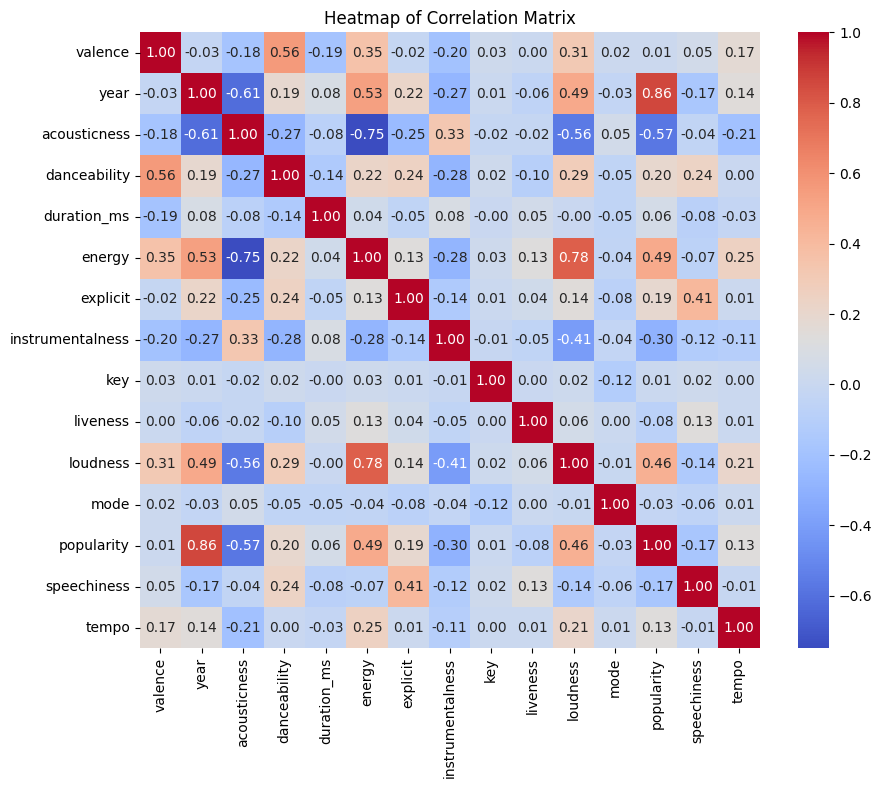

In [13]:
# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [14]:
# Standouts in data: popularity & year, energy & year, loudness & year, acousticness & year
# It is worth looking at the trends of these features over the years

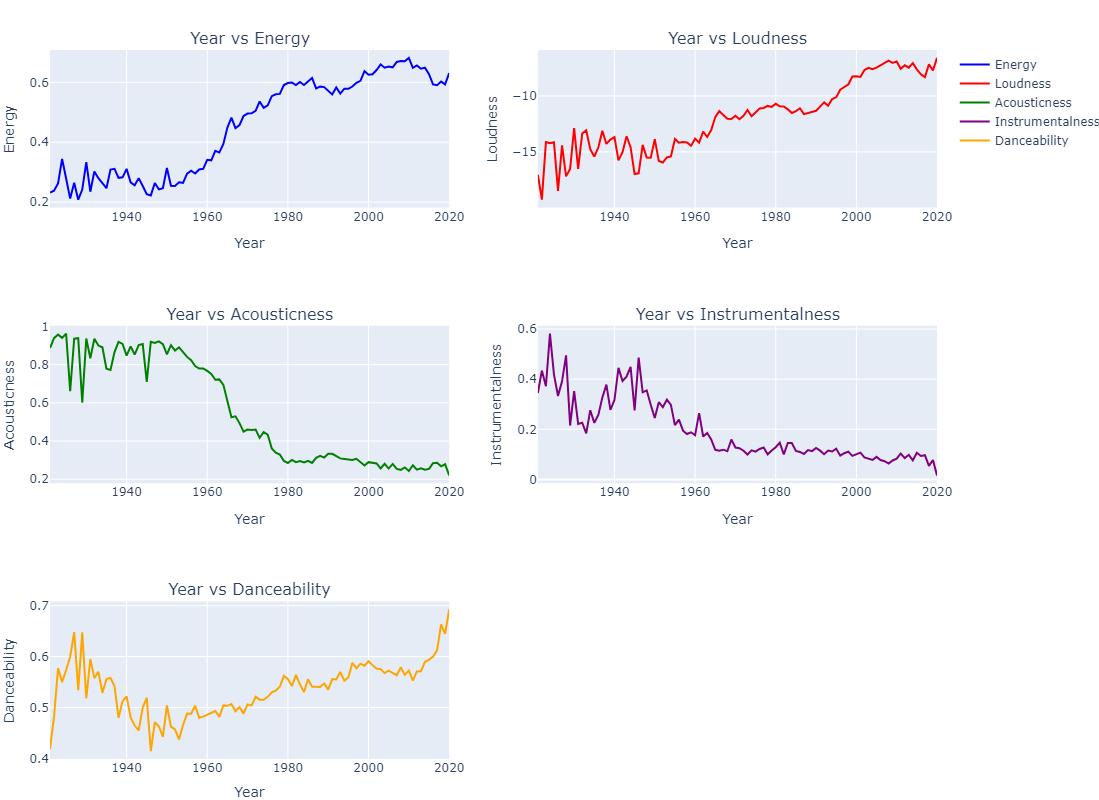

In [15]:
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Year vs Energy", "Year vs Loudness",
                                    "Year vs Acousticness", "Year vs Instrumentalness",
                                    "Year vs Danceability"))

fig.add_trace(go.Scatter(x=data_year['year'], y=data_year['energy'],
                         mode='lines', name='Energy', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=data_year['year'], y=data_year['loudness'],
                         mode='lines', name='Loudness', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=data_year['year'], y=data_year['acousticness'],
                         mode='lines', name='Acousticness', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=data_year['year'], y=data_year['instrumentalness'],
                         mode='lines', name='Instrumentalness', line=dict(color='purple')), row=2, col=2)
fig.add_trace(go.Scatter(x=data_year['year'], y=data_year['danceability'],
                         mode='lines', name='Danceability', line=dict(color='orange')), row=3, col=1)

# Update layout
fig.update_layout(showlegend=True, margin=dict(l=50, r=50, t=50, b=0), height=800)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_yaxes(title_text="Energy", row=1, col=1)

fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_yaxes(title_text="Loudness", row=1, col=2)

fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Acousticness", row=2, col=1)

fig.update_xaxes(title_text="Year", row=2, col=2)
fig.update_yaxes(title_text="Instrumentalness", row=2, col=2)

fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_yaxes(title_text="Danceability", row=3, col=1)

fig.show()

In [16]:
# Do the same thing replacing year with popularity; results should be similar

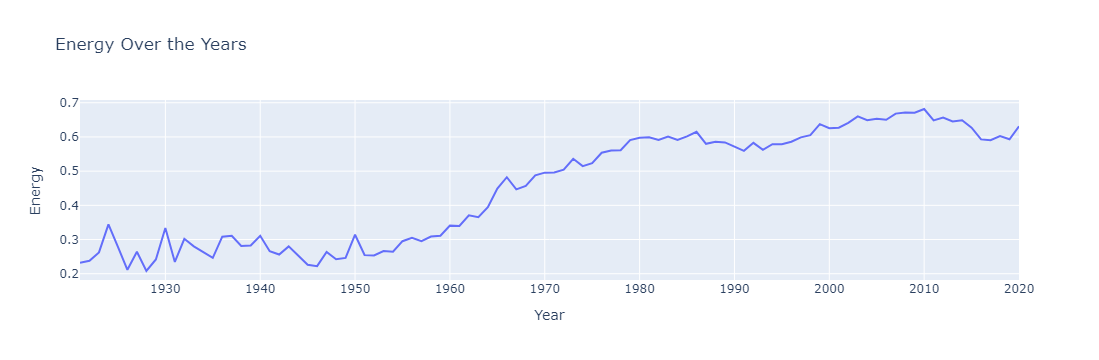

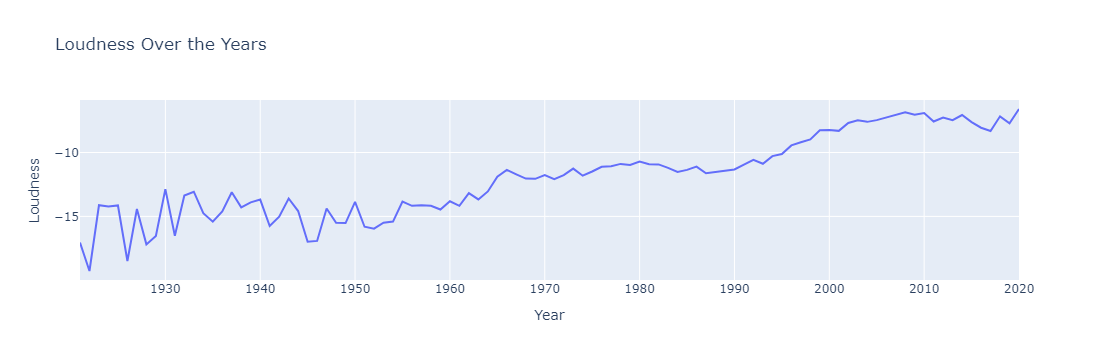

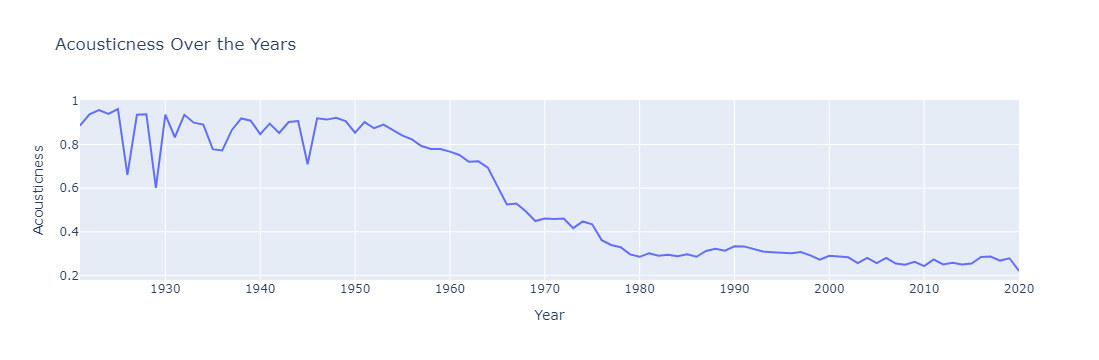

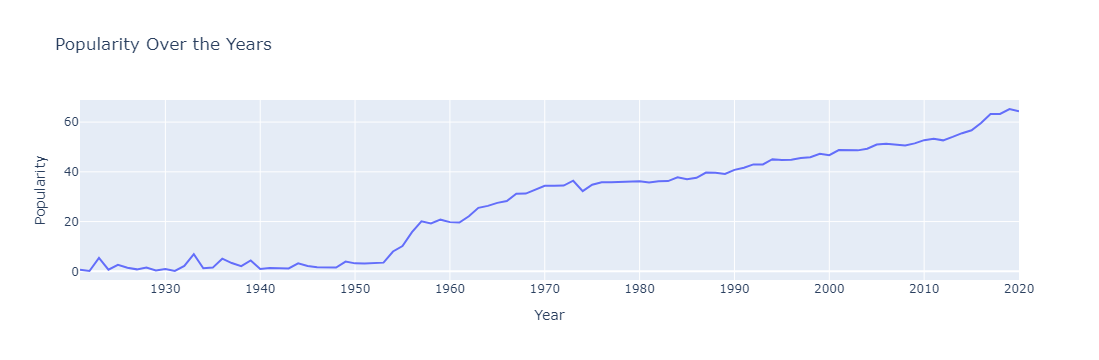

In [17]:
fig = px.line(data_year, x='year', y='energy', title='Energy Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Energy')
fig.show()

# Loudness vs Year
fig = px.line(data_year, x='year', y='loudness', title='Loudness Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Loudness')
fig.show()

# Acousticness vs Year
fig = px.line(data_year, x='year', y='acousticness', title='Acousticness Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Acousticness')
fig.show()

# Popularity vs Year
fig = px.line(data_year, x='year', y='popularity', title='Popularity Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Popularity')
fig.show()

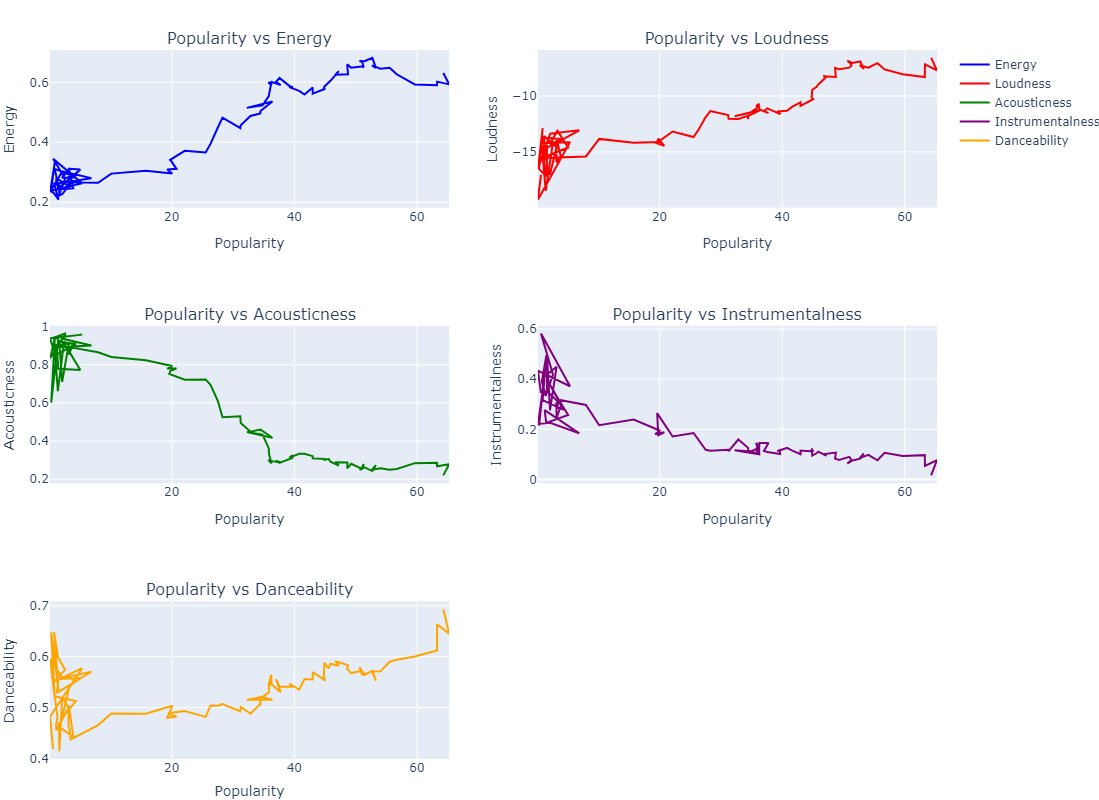

In [18]:
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Popularity vs Energy", "Popularity vs Loudness",
                                    "Popularity vs Acousticness", "Popularity vs Instrumentalness",
                                    "Popularity vs Danceability"))

fig.add_trace(go.Scatter(x=data_year['popularity'], y=data_year['energy'],
                         mode='lines', name='Energy', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=data_year['popularity'], y=data_year['loudness'],
                         mode='lines', name='Loudness', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=data_year['popularity'], y=data_year['acousticness'],
                         mode='lines', name='Acousticness', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=data_year['popularity'], y=data_year['instrumentalness'],
                         mode='lines', name='Instrumentalness', line=dict(color='purple')), row=2, col=2)
fig.add_trace(go.Scatter(x=data_year['popularity'], y=data_year['danceability'],
                         mode='lines', name='Danceability', line=dict(color='orange')), row=3, col=1)

# Update layout
fig.update_layout(showlegend=True, margin=dict(l=50, r=50, t=50, b=0), height=800)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Popularity", row=1, col=1)
fig.update_yaxes(title_text="Energy", row=1, col=1)

fig.update_xaxes(title_text="Popularity", row=1, col=2)
fig.update_yaxes(title_text="Loudness", row=1, col=2)

fig.update_xaxes(title_text="Popularity", row=2, col=1)
fig.update_yaxes(title_text="Acousticness", row=2, col=1)

fig.update_xaxes(title_text="Popularity", row=2, col=2)
fig.update_yaxes(title_text="Instrumentalness", row=2, col=2)

fig.update_xaxes(title_text="Popularity", row=3, col=1)
fig.update_yaxes(title_text="Danceability", row=3, col=1)

fig.show()

In [19]:
# Over time, there is an increasing amount of music that is higher in energy, loudness, and danceability
# There is a decreasing amount of music that is acoustic/instrumental
# In the modern age, the most popular music is high in energy, loudness, and danceability
# Acoustic/instrumental music has become less popular

In [20]:
# Now let's see how these features vary for the top 15 most popular genres
top15_genres = data_genre.nlargest(15, 'popularity')

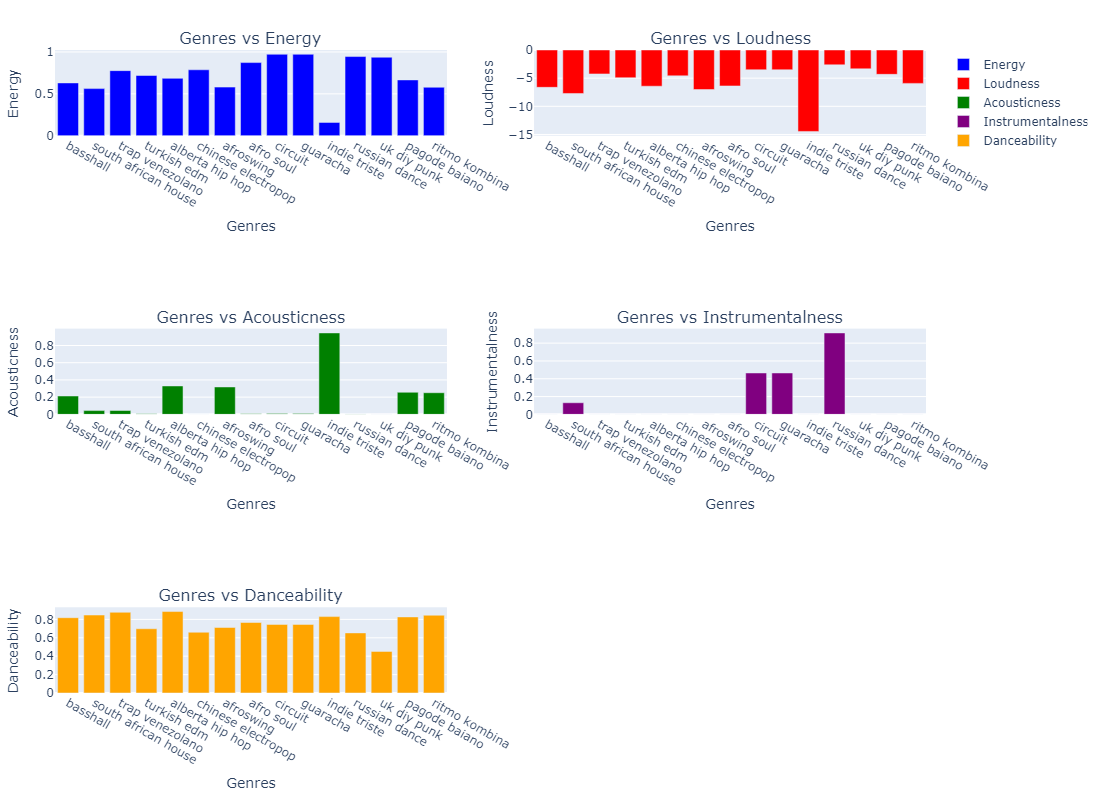

In [21]:
fig = make_subplots(rows=3, cols=2, vertical_spacing=0.3,
                    subplot_titles=("Genres vs Energy", "Genres vs Loudness",
                                    "Genres vs Acousticness", "Genres vs Instrumentalness",
                                    "Genres vs Danceability"))

fig.add_trace(go.Bar(x=top15_genres['genres'], y=top15_genres['energy'],
                     name='Energy', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Bar(x=top15_genres['genres'], y=top15_genres['loudness'],
                     name='Loudness', marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Bar(x=top15_genres['genres'], y=top15_genres['acousticness'],
                     name='Acousticness', marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Bar(x=top15_genres['genres'], y=top15_genres['instrumentalness'],
                     name='Instrumentalness', marker=dict(color='purple')), row=2, col=2)
fig.add_trace(go.Bar(x=top15_genres['genres'], y=top15_genres['danceability'],
                     name='Danceability', marker=dict(color='orange')), row=3, col=1)

# Update layout
fig.update_layout(showlegend=True, height=800, margin=dict(l=50, r=50, t=50, b=50))

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Genres", row=1, col=1)
fig.update_yaxes(title_text="Energy", row=1, col=1)

fig.update_xaxes(title_text="Genres", row=1, col=2)
fig.update_yaxes(title_text="Loudness", row=1, col=2)

fig.update_xaxes(title_text="Genres", row=2, col=1)
fig.update_yaxes(title_text="Acousticness", row=2, col=1)

fig.update_xaxes(title_text="Genres", row=2, col=2)
fig.update_yaxes(title_text="Instrumentalness", row=2, col=2)

fig.update_xaxes(title_text="Genres", row=3, col=1)
fig.update_yaxes(title_text="Danceability", row=3, col=1)

fig.show()

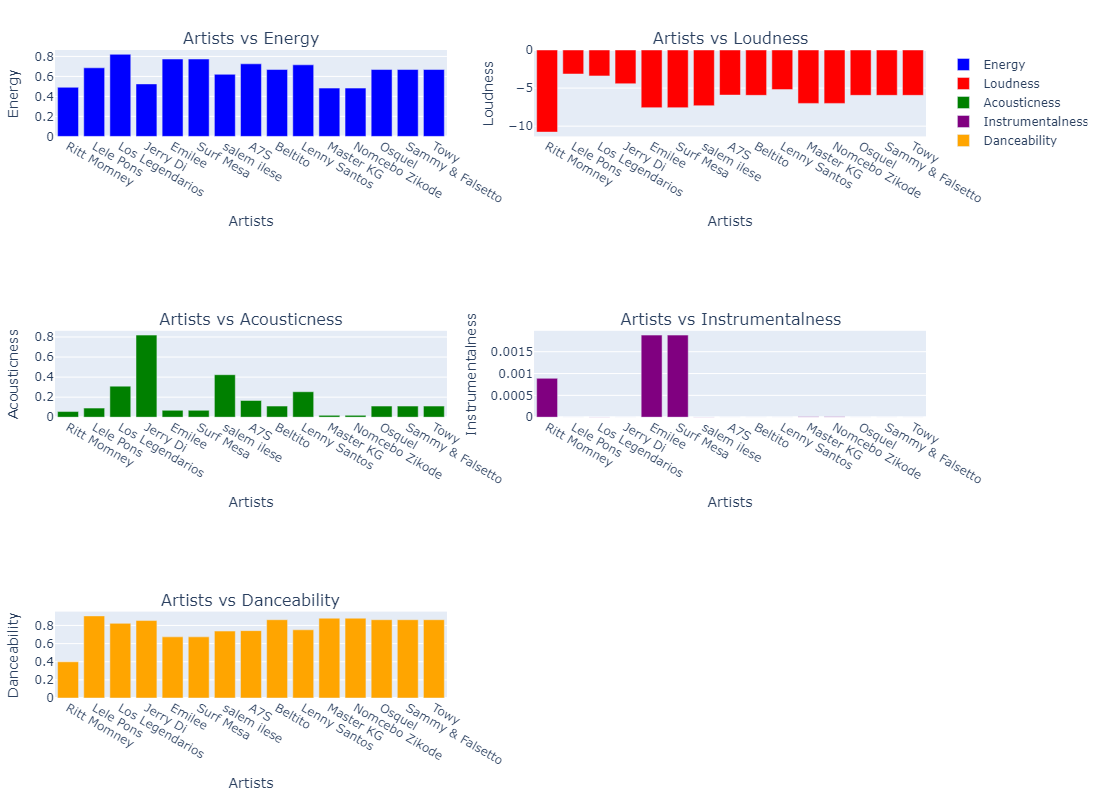

In [22]:
# Assuming data_artist is already defined and contains the relevant data
top15_artists = data_artist.nlargest(15, 'popularity')

fig = make_subplots(rows=3, cols=2, vertical_spacing=0.3,
                    subplot_titles=("Artists vs Energy", "Artists vs Loudness",
                                    "Artists vs Acousticness", "Artists vs Instrumentalness",
                                    "Artists vs Danceability"))

fig.add_trace(go.Bar(x=top15_artists['artists'], y=top15_artists['energy'],
                     name='Energy', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Bar(x=top15_artists['artists'], y=top15_artists['loudness'],
                     name='Loudness', marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Bar(x=top15_artists['artists'], y=top15_artists['acousticness'],
                     name='Acousticness', marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Bar(x=top15_artists['artists'], y=top15_artists['instrumentalness'],
                     name='Instrumentalness', marker=dict(color='purple')), row=2, col=2)
fig.add_trace(go.Bar(x=top15_artists['artists'], y=top15_artists['danceability'],
                     name='Danceability', marker=dict(color='orange')), row=3, col=1)


fig.update_layout(showlegend=True, height=800, margin=dict(l=50, r=50, t=50, b=50))


fig.update_xaxes(title_text="Artists", row=1, col=1)
fig.update_yaxes(title_text="Energy", row=1, col=1)

fig.update_xaxes(title_text="Artists", row=1, col=2)
fig.update_yaxes(title_text="Loudness", row=1, col=2)

fig.update_xaxes(title_text="Artists", row=2, col=1)
fig.update_yaxes(title_text="Acousticness", row=2, col=1)

fig.update_xaxes(title_text="Artists", row=2, col=2)
fig.update_yaxes(title_text="Instrumentalness", row=2, col=2)

fig.update_xaxes(title_text="Artists", row=3, col=1)
fig.update_yaxes(title_text="Danceability", row=3, col=1)

fig.show()


# Formulate recommendation algorithms

In [23]:
# Read the datasets
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')
artist_data = pd.read_csv('data_by_artist.csv')

# features for the recommendation system
features = ['valence', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']

# standardize them
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

## Cosine Similarity

In [24]:
# function to recommend songs based on a given song
def recommend_songs_cos(song_name, data, features, n_recommendations=5):
    # Find the song in the dataset
    song = data[data['name'].str.lower() == song_name.lower()]
    if song.empty:
        print(f"Song '{song_name}' not found in the dataset.")
        return []


    
    # cosine similarity
    song_index = song.index[0]
    song_features = song[features].values
    all_features = data[features].values
    similarity = cosine_similarity(song_features, all_features).flatten()

    #get the indices of the top n recommendations, excluding the original song
    similarity_indices = similarity.argsort()[::-1]
    similarity_indices = similarity_indices[similarity_indices != song_index]

    # adjust  the number of recommendations if necessary
    similarity_indices = similarity_indices[:n_recommendations * 2] 


    similarity_indices = [index for index in similarity_indices if index < len(data)]

    # remove duplicates + get song
    recommended_songs = data.iloc[similarity_indices][['name', 'artists']].drop_duplicates()



    
    recommended_songs = recommended_songs.head(n_recommendations)

    return recommended_songs


## K Means Clustering

In [25]:
# train the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Function to recommend songs based on a given song
def recommend_songs_kmeans(song_name, data, features, kmeans_model, n_recommendations=5):
    # Find the song in the dataset
    song = data[data['name'].str.lower() == song_name.lower()]
    if song.empty:
        print(f"Song '{song_name}' not found in the dataset.")
        return []


    
    # get the cluster of the song
    song_cluster = song['cluster'].values[0]


    
    # find other songs in the same cluster
    cluster_songs = data[data['cluster'] == song_cluster]

    # remove the OG song itself from the recommendations
    cluster_songs = cluster_songs[cluster_songs['name'].str.lower() != song_name.lower()]


    
    # iff there are fewer songs in the cluster than n_recommendations, return all of them
    n_recommendations = min(n_recommendations, len(cluster_songs))

    
    # randomly select n recommendations from the cluster
    recommended_songs = cluster_songs.sample(n_recommendations)[['name', 'artists']]
    return recommended_songs

## KNN

In [26]:
knn = NearestNeighbors(n_neighbors=6, algorithm='auto')
knn.fit(data[features])



def recommend_songs_knn(song_name, data, features, knn_model, n_recommendations=5):
    # Find the song in the dataset
    song = data[data['name'].str.lower() == song_name.lower()]
    if song.empty:
        print(f"Song '{song_name}' not found in the dataset.")
        return []

    song_features = song[features].values

    #nearest neighbors
    distances, indices = knn_model.kneighbors(song_features, n_neighbors=len(data))
    
    #flatten the indices array and convert to a list
    recommended_indices = indices.flatten().tolist()

    # take out the index of the input song from the recommendations
    song_index = song.index[0]
    if song_index in recommended_indices:
        recommended_indices.remove(song_index)

    # get the top n_recommendations indices
    recommended_indices = recommended_indices[:n_recommendations]

    # deduplicate
    recommended_songs = data.iloc[recommended_indices][['name', 'artists']].drop_duplicates()

    
    while len(recommended_songs) < n_recommendations:
        # add more songs if necessary
        next_index = len(recommended_songs) + len(recommended_indices)
        if next_index < len(data):
            additional_indices = indices.flatten().tolist()[next_index:next_index + 1]
            additional_songs = data.iloc[additional_indices][['name', 'artists']].drop_duplicates()
            recommended_songs = pd.concat([recommended_songs, additional_songs])
        else:
            break

    recommended_songs = recommended_songs.head(n_recommendations)
    
    return recommended_songs

## SVD

In [27]:
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_matrix = svd.fit_transform(data[features])


def recommend_songs_svd(song_name, data, svd_matrix, n_recommendations=5):
    # Find the song in the dataset
    song_index = data[data['name'].str.lower() == song_name.lower()].index
    if song_index.empty:
        print(f"Song '{song_name}' not found in the dataset.")
        return []


    
    #    Ensure the song_index is a single integer
    song_index = song_index[0]

   # cosine similarity between the song and all other songs
    song_features = svd_matrix[song_index].reshape(1, -1) 
    similarity = cosine_similarity(song_features, svd_matrix).flatten()

 
    similarity_indices = similarity.argsort()[-(n_recommendations+1):-1][::-1]

    # are indices valid??
    if any(index >= len(data) or index < 0 for index in similarity_indices):
        print(f"Invalid indices found: {similarity_indices}")
        return []


    recommended_songs = data.iloc[similarity_indices][['name']]
    return recommended_songs

# Evaluate performance of recommender systems

## Calculate average popularity score for each model output

In [29]:
song_names = ['Blinding Lights', 'Nonstop', 'Good Directions', 'Spanish Guitar']
models = {
    'Cosine Similarity': recommend_songs_cos,
    'KMeans': recommend_songs_kmeans,
    'KNN': recommend_songs_knn,
    'SVD': recommend_songs_svd
}

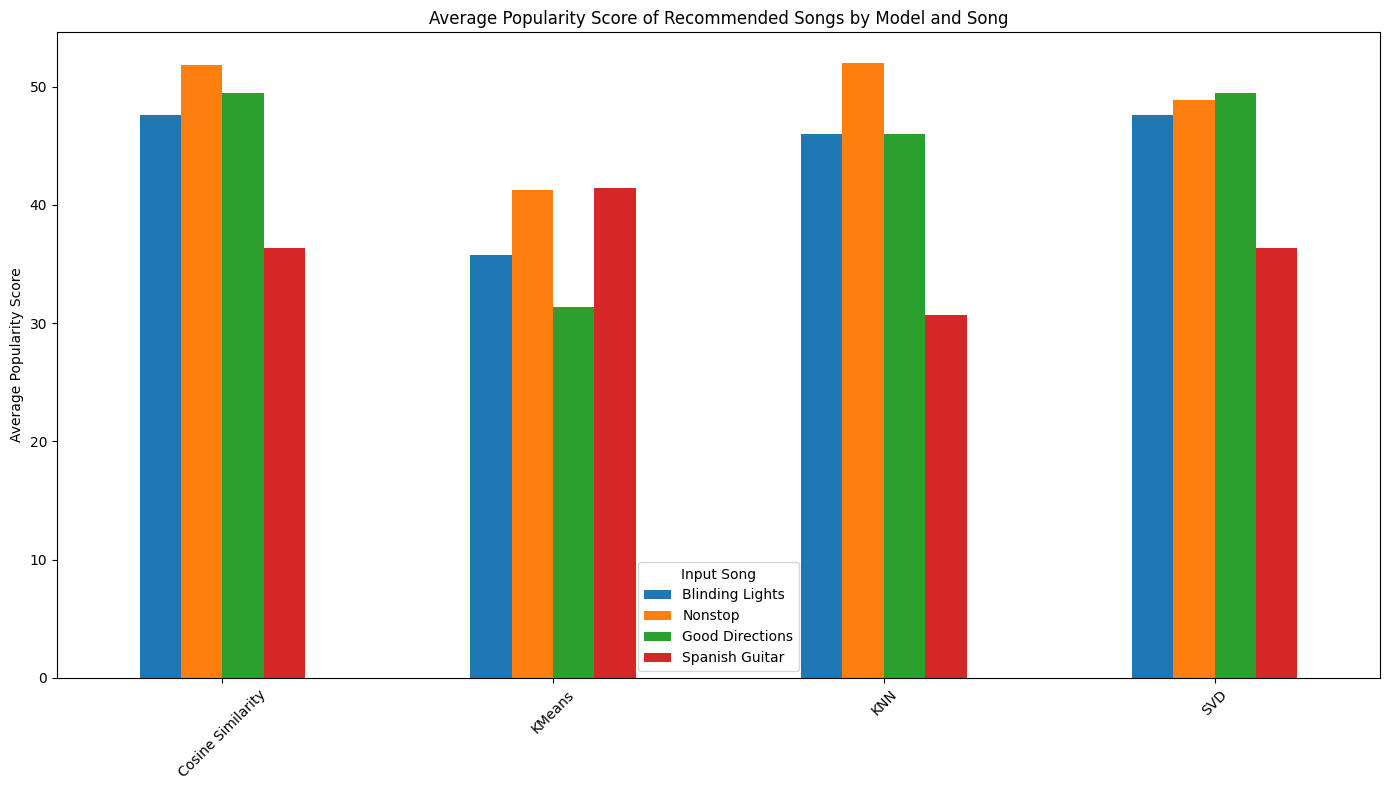

In [30]:
results = {model_name: {song_name: None for song_name in song_names} for model_name in models}

for model_name, model_function in models.items():
    for song in song_names:
        if model_name == 'KMeans':
            recommended_songs = model_function(song, data, features, kmeans)
        elif model_name == 'KNN':
            recommended_songs = model_function(song, data, features, knn)
        elif model_name == 'SVD':
            recommended_songs = model_function(song, data, svd_matrix)
        else:
            recommended_songs = model_function(song, data, features)
        
        if not recommended_songs.empty:
            recommended_songs = recommended_songs.merge(data[['name', 'popularity']], on='name', how='left')
            average_popularity = recommended_songs['popularity'].mean()
            results[model_name][song] = average_popularity



results_df = pd.DataFrame(results).T

results_df.plot(kind='bar', figsize=(14, 8))
plt.ylabel('Average Popularity Score')
plt.title('Average Popularity Score of Recommended Songs by Model and Song')
plt.xticks(rotation=45)
plt.legend(title='Input Song')
plt.tight_layout()
plt.show()

In [31]:
average_scores = results_df.mean(axis=1).to_frame(name='Average Score')
pd.DataFrame(average_scores)

Average Score
Cosine Similarity      46.291667
KMeans                 37.446997
KNN                    43.678571
SVD                    45.557018

In [39]:
popularity_scores = data[data['name'].isin(song_names)][['name', 'popularity']]
popularity_scores.groupby('name').mean().reset_index()

name  popularity
0  Blinding Lights        96.0
1  Good Directions        61.5
2          Nonstop        79.0
3   Spanish Guitar        39.5

# Doing it on testing data (100 sample) seed = 12 for reproducing results

In [38]:
seed = 12

# Randomly select 100 songs from the dataset
random_100_songs = data.sample(n=100, random_state=seed)

In [39]:
random_100_songs['name']

131084             If I Lose My Mind
148870    Happy, Happy Birthday Baby
154580             Chemical Prisoner
27685           Just Once In My Life
89642                         People
                     ...            
28389                     Main Theme
50411               You're the Voice
104666                   El Afilador
141226                          1912
16698            Pickin' Wildflowers
Name: name, Length: 100, dtype: object

In [40]:
models = {
    'Cosine Similarity': recommend_songs_cos,
    'KMeans': recommend_songs_kmeans,
    'KNN': recommend_songs_knn,
    'SVD': recommend_songs_svd
}
results = {model_name: {song_name: None for song_name in random_100_songs['name']} for model_name in models}

for model_name, model_function in models.items():
    for song in random_100_songs['name']:
        if model_name == 'KMeans':
            recommended_songs = model_function(song, data, features, kmeans)
        elif model_name == 'KNN':
            recommended_songs = model_function(song, data, features, knn)
        elif model_name == 'SVD':
            recommended_songs = model_function(song, data, svd_matrix)
        else:
            recommended_songs = model_function(song, data, features)
        
        if not recommended_songs.empty:
            recommended_songs = recommended_songs.merge(data[['name', 'popularity']], on='name', how='left')
            average_popularity = recommended_songs['popularity'].mean()
            results[model_name][song] = average_popularity



results_df = pd.DataFrame(results).T



In [41]:
results_df

If I Lose My Mind  Happy, Happy Birthday Baby  \
Cosine Similarity          19.857143                   37.600000   
KMeans                     22.909091                   25.285714   
KNN                        15.600000                   38.538462   
SVD                        19.857143                   37.600000   

                   Chemical Prisoner  Just Once In My Life     People  \
Cosine Similarity          58.333333             16.750000   0.000000   
KMeans                     45.875000             27.947368   8.500000   
KNN                        46.400000             33.784091  11.400000   
SVD                        58.333333             16.750000  21.833333   

                   The Search    L'enfer  Carro Viejo - Remasterizado  \
Cosine Similarity   39.600000  35.120000                          0.6   
KMeans              42.818182  13.666667                          8.0   
KNN                 42.222222  33.142857                          0.6   
SVD                 41.777778  35.120000                          0.6   

                   There Must Be an Angel (Playing with My Heart)  \
Cosine Similarity                                       28.333333   
KMeans                                                  49.380000   
KNN                                                     53.777778   
SVD                                                     40.066667   

                   Oye Cómo Va  ...  \
Cosine Similarity    11.000000  ...   
KMeans               50.750000  ...   
KNN                  22.500000  ...   
SVD                  18.833333  ...   

                   If I Knew You Were Comin', I'd've Baked a Cake  \
Cosine Similarity                                            26.4   
KMeans                                                       23.0   
KNN                                                          17.8   
SVD                                                          26.4   

                   Life Turned Her That Way  Stand Back  \
Cosine Similarity                 25.750000   42.400000   
KMeans                            28.272727   44.714286   
KNN                               30.785714   43.200000   
SVD                               32.333333   42.400000   

                   Al Gran Bonete - Remasterizado  \
Cosine Similarity                       28.818182   
KMeans                                  14.600000   
KNN                                     11.200000   
SVD                                     28.818182   

                   Часть 163.2 - По ком звонит колокол  Main Theme  \
Cosine Similarity                                  1.0   33.000000   
KMeans                                             0.0   12.222222   
KNN                                                1.0   24.000000   
SVD                                                1.0   26.200000   

                   You're the Voice  El Afilador  1912  Pickin' Wildflowers  
Cosine Similarity         28.454545    49.750000  2.60            51.600000  
KMeans                    33.578947    50.714286  6.75            47.000000  
KNN                       28.181818    49.250000  2.60            50.166667  
SVD                       28.454545    49.750000  2.60            40.833333  

[4 rows x 100 columns]

In [42]:
average_scores = results_df.mean(axis=1).to_frame(name='Average Score')
pd.DataFrame(average_scores)

Average Score
Cosine Similarity      29.327341
KMeans                 30.216192
KNN                    29.116791
SVD                    29.828204